## Optimisation de la taille de la sortie

In [1]:
from PIL import Image
import main as m
import homography as h
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 10
NonAffectes = []
SurAffectes = []

In [3]:
MargesListe = np.linspace(20, 200, N)
I = Image.open("images/Affine1.jpg", mode="r").convert('L')
Img = m.Compresser(np.array(I), 1)
print(MargesListe)

[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


In [4]:
for margin in MargesListe:
    margin = round(margin)
    print(margin)
    PE = np.array([
    [1000, 55],
    [755, 920],
    [270, 130],
    [20, 1000]
    ])
    PS = np.array([
    [1024-margin, margin],
    [1024-margin, 1024-margin],
    [margin, margin],
    [margin, 1024-margin]
    ])
    xe, ye = PE.T
    xs, ys = PS.T

    f_Image, e_suraffectations = h.TransformationProjective(Img, PE, PS)
    e_nonaffecte = h.ErreurNonAffecte(f_Image, [[margin, margin],
                                                [1024-margin, margin],
                                                [margin, 1024-margin],
                                                [1024-margin, 1024-margin]])
    NonAffectes.append(e_nonaffecte / (1024-2*margin)**2)
    SurAffectes.append(e_suraffectations / 1024**2)

20
40
60
80
100
120
140
160
180
200


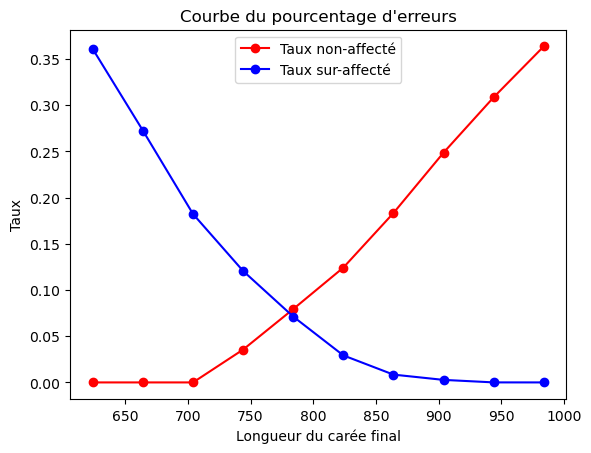

In [5]:
X = 1024 - 2*MargesListe
Pertes = 1024/X
plt.figure()
plt.plot(X, NonAffectes, marker='o', color='red', label="Taux non-affecté")
plt.plot(X, SurAffectes, marker='o',  color='blue', label="Taux sur-affecté")
#plt.plot(X, Pertes, color='green', label="Taux perte de données")
plt.xlabel("Longueur du carée final")
plt.ylabel("Taux")
plt.title("Courbe du pourcentage d'erreurs")
plt.legend()
plt.show()

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args: 'ArrayLike', alpha: 'float | None' = None, norm: 'str | Normalize | None' = None, cmap: 'str | Colormap | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, shading: "Literal['flat', 'nearest', 'gouraud', 'auto'] | None" = None, antialiased: 'bool' = False, data=None, **kwargs) -> 'QuadMesh'
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : array-like
        The mesh data. Supported array shapes are:
   